**Gold Price Prediction**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np

Loading the Dataset

In [57]:
gold_price = pd.read_csv('/content/Gold Price Prediction Dataset.csv')

In [58]:
gold_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
4,21-12-11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,NaN,NaN,122.750000,124.169998,107.838242,B,107.71,107.15,108.17,106.16,145090,A


In [59]:
gold_price.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
1713,24-12-18,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,A,50.47,53.49,54.66,50.36,76220,B
1714,26-12-18,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,B,54.47,50.84,55.29,49.93,77000,A
1715,27-12-18,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,A,52.16,54.65,54.67,51.94,102590,B
1716,28-12-18,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,A,52.20,53.44,53.80,51.60,17110,A
1717,31-12-18,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,249.919998,A,53.80,53.00,54.82,52.66,109110,A


In [60]:
print(gold_price.shape)

(1718, 19)


In [61]:
print(gold_price.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'EU_Trend',
       'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'],
      dtype='object')


In [62]:
print(gold_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1718 non-null   object 
 1   Open        1718 non-null   float64
 2   High        1718 non-null   float64
 3   Low         1718 non-null   float64
 4   Close       1718 non-null   float64
 5   Adj Close   1718 non-null   float64
 6   Volume      1718 non-null   int64  
 7   SP_open     1697 non-null   float64
 8   SP_high     1697 non-null   float64
 9   SP_low      1718 non-null   float64
 10  SP_close    1718 non-null   float64
 11  SP_Ajclose  1718 non-null   float64
 12  EU_Trend    1718 non-null   object 
 13  OF_Price    1718 non-null   float64
 14  OF_Open     1718 non-null   float64
 15  OF_High     1718 non-null   float64
 16  OF_Low      1718 non-null   float64
 17  OF_Volume   1718 non-null   int64  
 18  OF_Trend    1718 non-null   object 
dtypes: float64(14), int64(2), o

**Dealing with NULL Values**

In [63]:
gold_price.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,21
SP_high,21
SP_low,0


Among 1718 values only 21 values are null for SP_open & SP_high. So, we cannot just drop the whole column rather we follow the pattern that the values are linearly increasing so we replace them accordingly.

In [64]:
gold_price['SP_open'] = gold_price ['SP_open'].interpolate(method='linear')
gold_price['SP_high'] = gold_price ['SP_high'].interpolate(method='linear')

In [65]:
gold_price.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,0
SP_high,0
SP_low,0


**Dealing with Duplicate Value**

In [66]:
print(gold_price.describe())

              Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000   
mean   8.446327e+06   204.472712   205.364825   203.487014   204.491222   
std    4.920731e+06    43.862601    43.988301    43.618940    43.776999   
min    1.501600e+06   122.059998 

In [67]:
#Details of Close and Adj Close are same so we compare the rows
equal_rows = gold_price['Close'] == gold_price['Adj Close']
equal_count = equal_rows.sum()
print(equal_count)

1718


In [68]:
#Thus both of the rows are identical and duplicate. We can remove Close because Adj Close is the Target Column
gold_price.drop(['Close'], inplace=True, axis=1)

**Handling Categorical Variables**

In [69]:
print(gold_price.shape)
print(gold_price.info())

(1718, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1718 non-null   object 
 1   Open        1718 non-null   float64
 2   High        1718 non-null   float64
 3   Low         1718 non-null   float64
 4   Adj Close   1718 non-null   float64
 5   Volume      1718 non-null   int64  
 6   SP_open     1718 non-null   float64
 7   SP_high     1718 non-null   float64
 8   SP_low      1718 non-null   float64
 9   SP_close    1718 non-null   float64
 10  SP_Ajclose  1718 non-null   float64
 11  EU_Trend    1718 non-null   object 
 12  OF_Price    1718 non-null   float64
 13  OF_Open     1718 non-null   float64
 14  OF_High     1718 non-null   float64
 15  OF_Low      1718 non-null   float64
 16  OF_Volume   1718 non-null   int64  
 17  OF_Trend    1718 non-null   object 
dtypes: float64(13), int64(2), object(3)
memory usage: 241.7+ 

In [70]:
# gold_price['Date'] = pd.to_datetime(gold_price['Date'])
# gold_price.set_index('Date', inplace=True)

In [71]:
gold_price['EU_Trend'] = gold_price['EU_Trend'].map({'A': 0, 'B': 1})
gold_price['OF_Trend'] = gold_price['OF_Trend'].map({'A': 0, 'B': 1})

**Feature Scaling and removing variables using correlation**

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [73]:
numeric_data = gold_price.select_dtypes(include='number')
x = numeric_data.drop('Adj Close', axis=1)
y = numeric_data['Adj Close']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled_df.head())

       Open      High       Low    Volume   SP_open   SP_high    SP_low  \
0  1.564704  1.537256  1.433596  2.658016 -1.857310 -1.868423 -1.868930   
1  1.540163  1.561084  1.559519  1.967348 -1.875554 -1.874108 -1.884753   
2  1.606936  1.588884  1.585969  0.833630 -1.879430 -1.888434 -1.913878   
3  1.683413  1.677956  1.713618  0.140258 -1.876694 -1.847047 -1.906081   
4  1.692543  1.683630  1.687744  0.721601 -1.867758 -1.839440 -1.851501   

   SP_close  SP_Ajclose  EU_Trend  OF_Price   OF_Open   OF_High    OF_Low  \
0 -1.880786   -1.788933 -1.010533  1.007037  1.000004  1.026647  1.035555   
1 -1.894268   -1.785710 -1.010533  0.943516  0.949928  0.955806  0.946959   
2 -1.923972   -1.808989  0.989577  0.954103  0.954314  0.956172  0.943664   
3 -1.840800   -1.743809 -1.010533  1.066906  0.978804  1.054765  1.000044   
4 -1.835316   -1.739510  0.989577  1.102682  1.082978  1.087629  1.082416   

   OF_Volume  OF_Trend  
0  -2.382704 -1.002331  
1  -0.966898  0.997674  
2  -0.87907

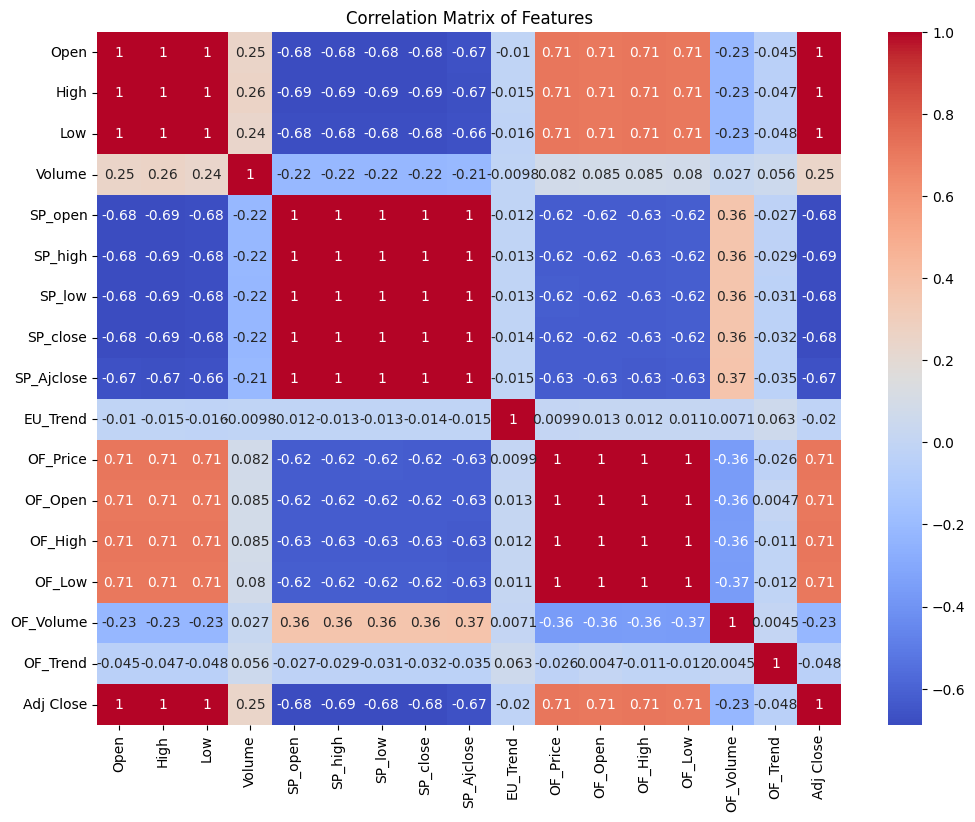

In [74]:
correlation_matrix = pd.concat([x_scaled_df, y], axis=1).corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

We can see high co-relation and chose to drop the column Open, High, Low, on the otherhand, we can see low co-relation and chose to drop EU_Trend, OF_Trend


In [75]:
x_scaled_df.drop(['Open'], inplace=True, axis=1)
x_scaled_df.drop(['High'], inplace=True, axis=1)
x_scaled_df.drop(['Low'], inplace=True, axis=1)
x_scaled_df.drop(['EU_Trend'], inplace=True, axis=1)
x_scaled_df.drop(['OF_Trend'], inplace=True, axis=1)

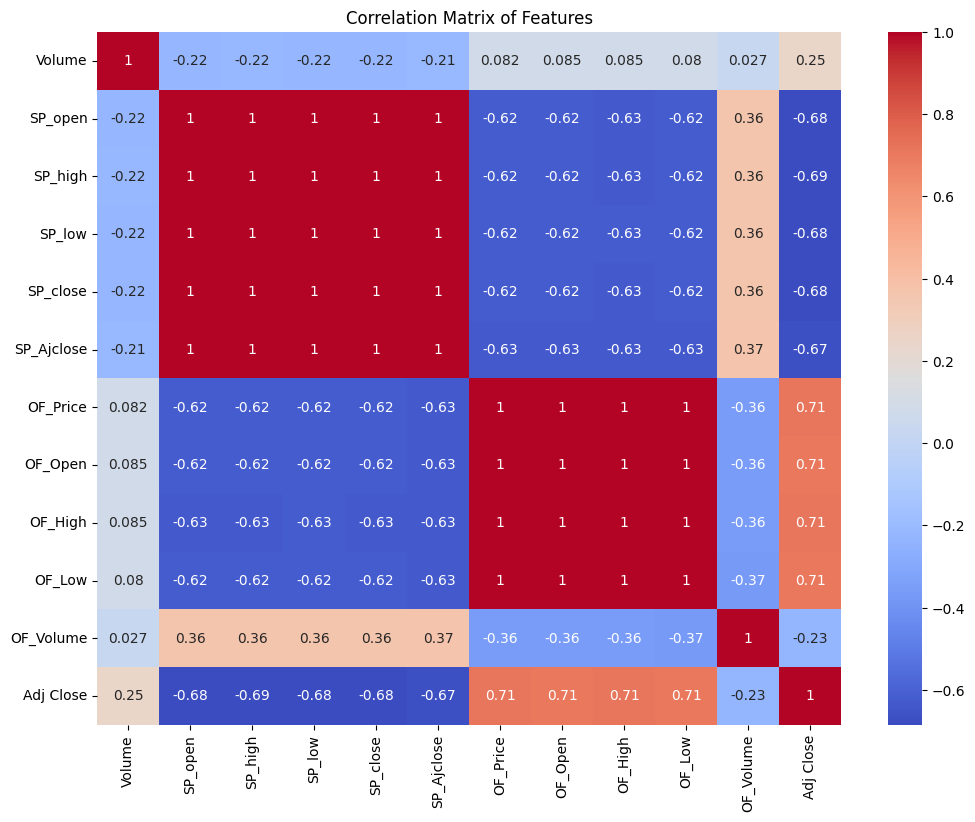

In [76]:
correlation_matrix = pd.concat([x_scaled_df, y], axis=1).corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()